In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
import glob
import matplotlib as mpl
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-white')
mpl.rcParams.update({'font.size': 16})

## Comparing Tame Equivalent Widths with By-Hand Measurements

### Automated Tame Run

In [3]:
# Read in ew data

ew_hand = pd.read_csv("tame-1.1.0/ngc2506_2380red_oned_26jan14.ew",delim_whitespace=True,header = None)
ew_tame = pd.read_csv("tame-1.1.0/ngc2506_2380red_oned_26jan14.aout",skiprows=1,delim_whitespace=True,header=None)

In [4]:
hand_df = ew_hand[[0,4]]  # Wavelength and Equivalent Width
tame_df = ew_tame[[0,4]]  # Wavelength and Equivalent Width

# Are they in order?
np.array(hand_df[0]) - np.array(tame_df[0])

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.])

In [5]:
np.array(hand_df[4])
pdiff = ((np.array(tame_df[4])-np.array(hand_df[4]))/np.array(hand_df[4])) * 100
#print(pdiff)
#print(np.mean(pdiff),np.median(pdiff),np.std(pdiff))
"""
fig = plt.figure(figsize=(15,10))
fig.dpi = 200
plt.plot(hand_df[0],pdiff,'.')
plt.grid()
plt.xlabel("Wavelength")
plt.ylabel("Equivalent Width Percent Difference")
plt.title("Equivalent Width Agreement between TAME and By-Hand")
"""

'\nfig = plt.figure(figsize=(15,10))\nfig.dpi = 200\nplt.plot(hand_df[0],pdiff,\'.\')\nplt.grid()\nplt.xlabel("Wavelength")\nplt.ylabel("Equivalent Width Percent Difference")\nplt.title("Equivalent Width Agreement between TAME and By-Hand")\n'

Average Percent Difference:  8.29262226437
Fraction of Measurements with greater than 10% Difference: 0.32119205298
Fraction of Lines with greater than 5% Difference: 0.5238095238095238
Fraction of Lines with greater than 10% Difference: 0.27380952380952384
Lines with greater than 20% Difference: [ 5607.66  5698.02  5760.35  5811.92  5861.11  6120.25]
Lines with greater than 30% Difference: [ 5861.11]


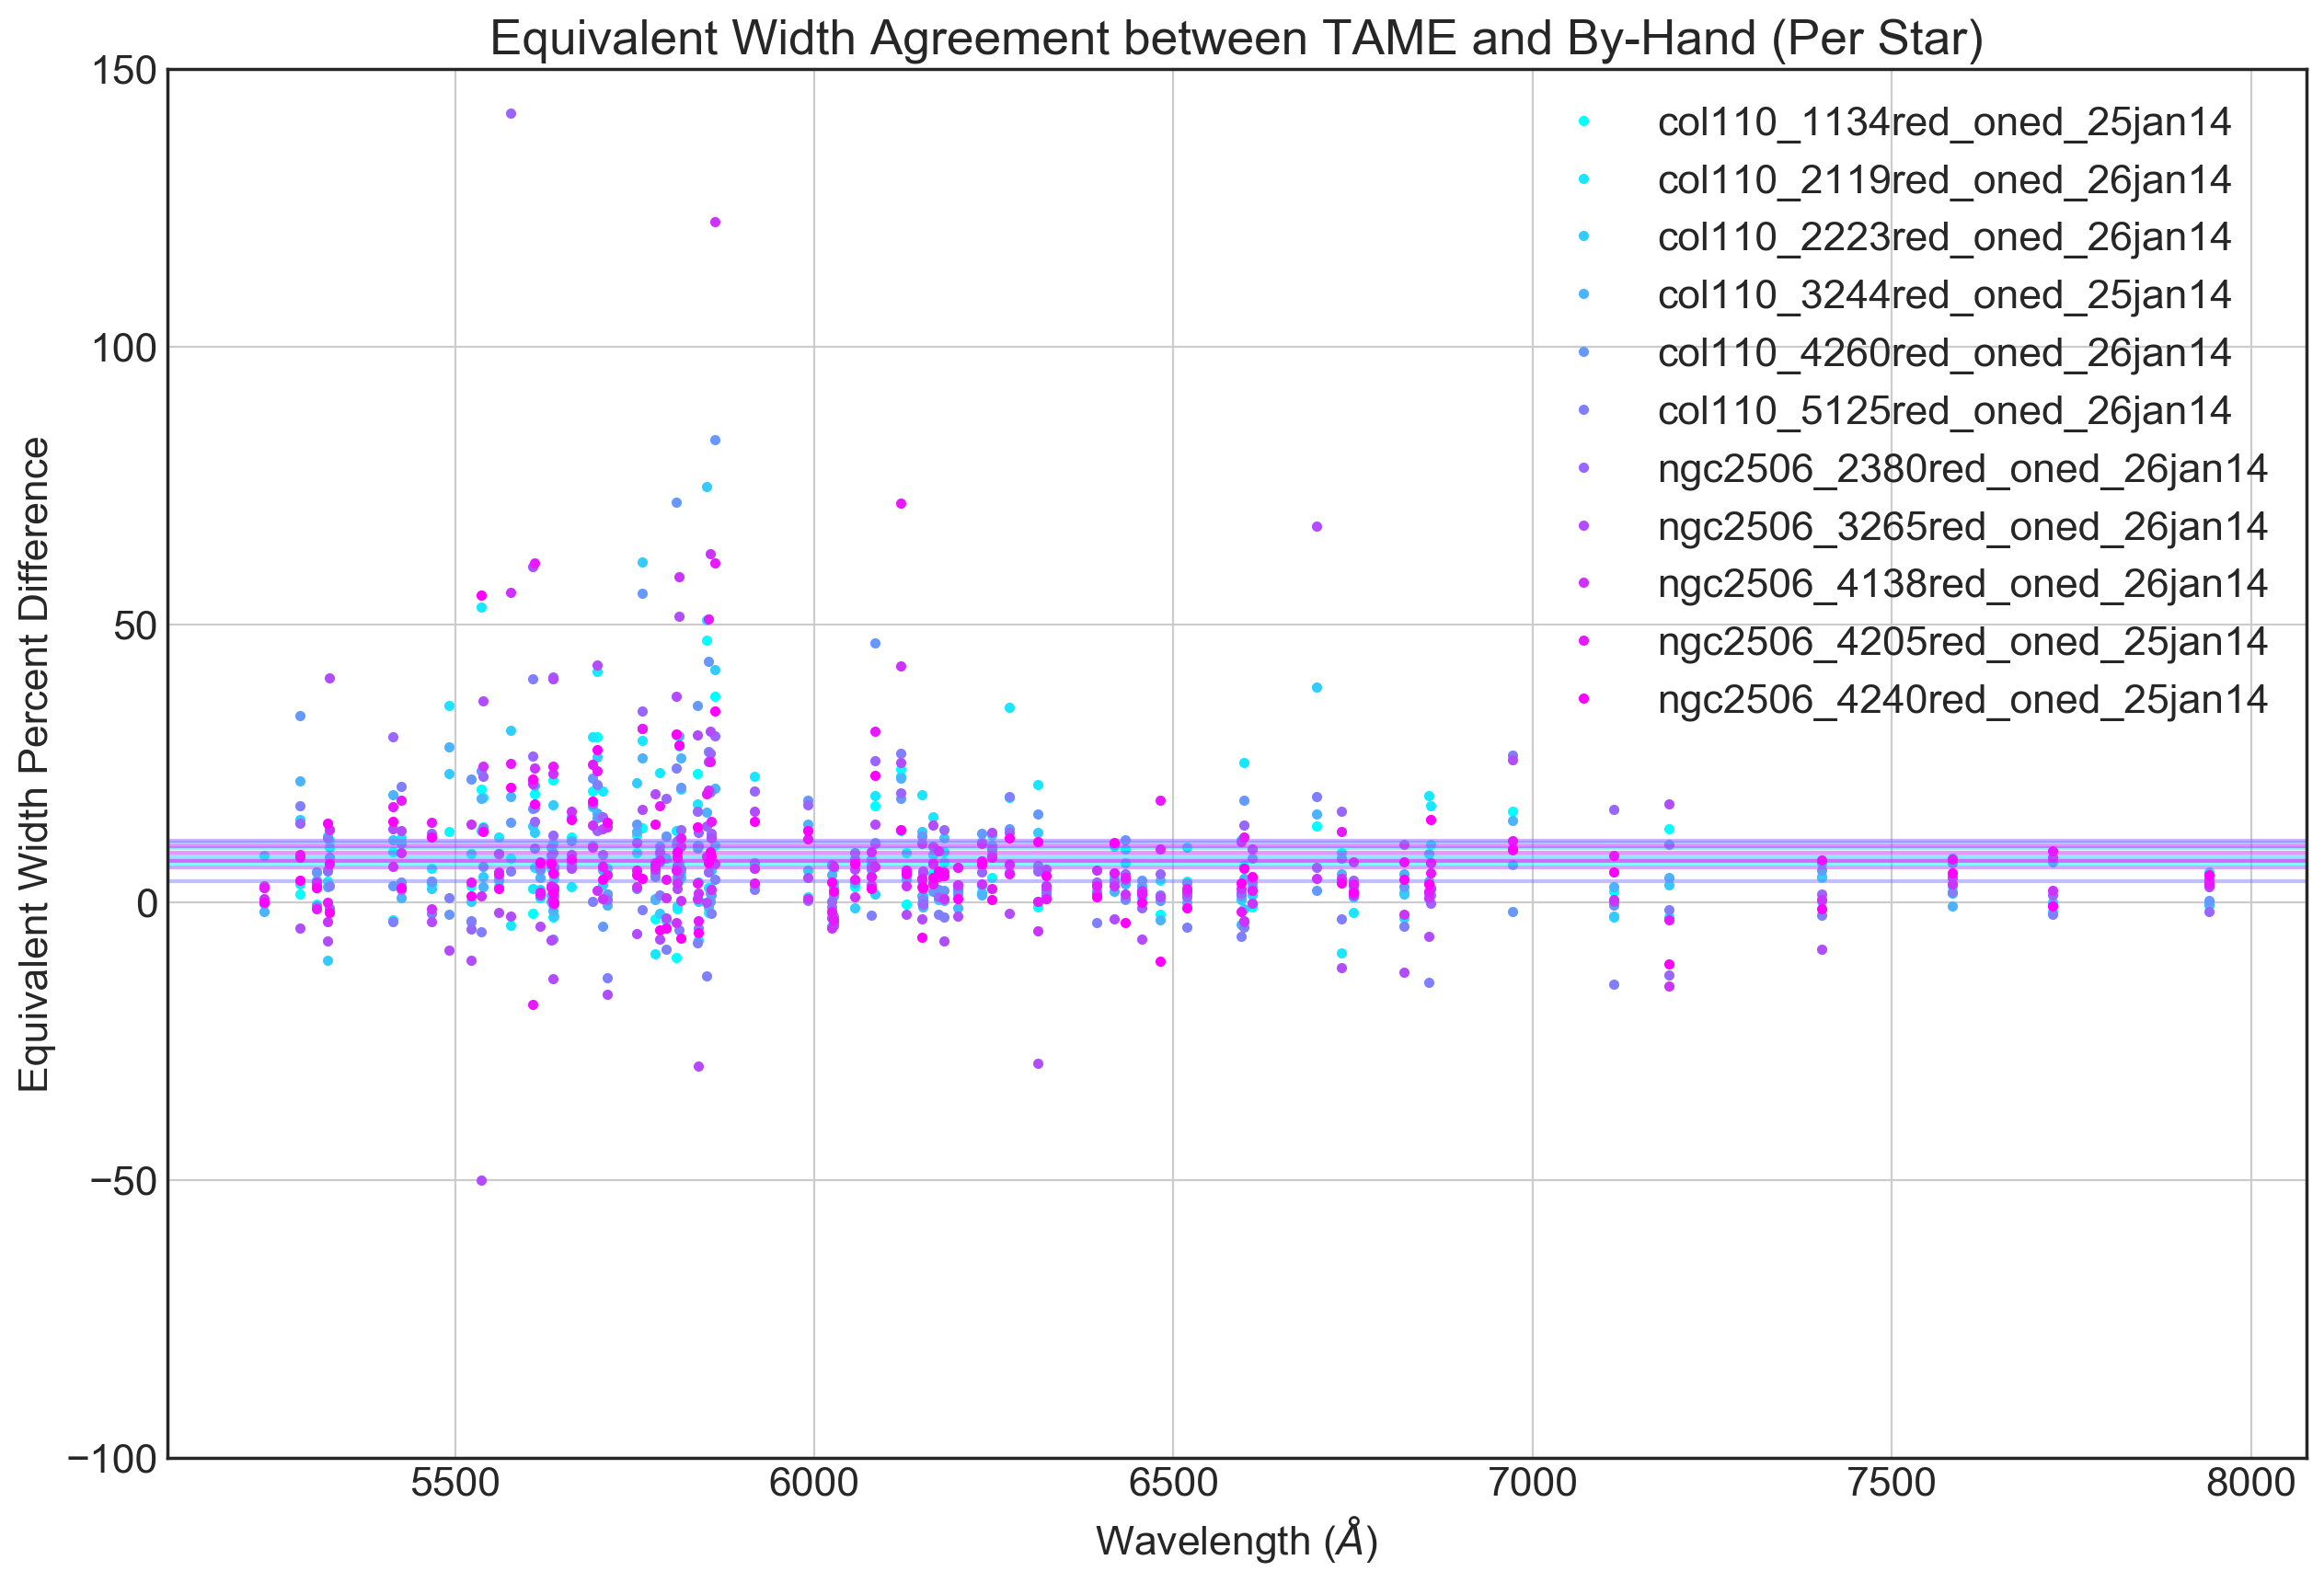

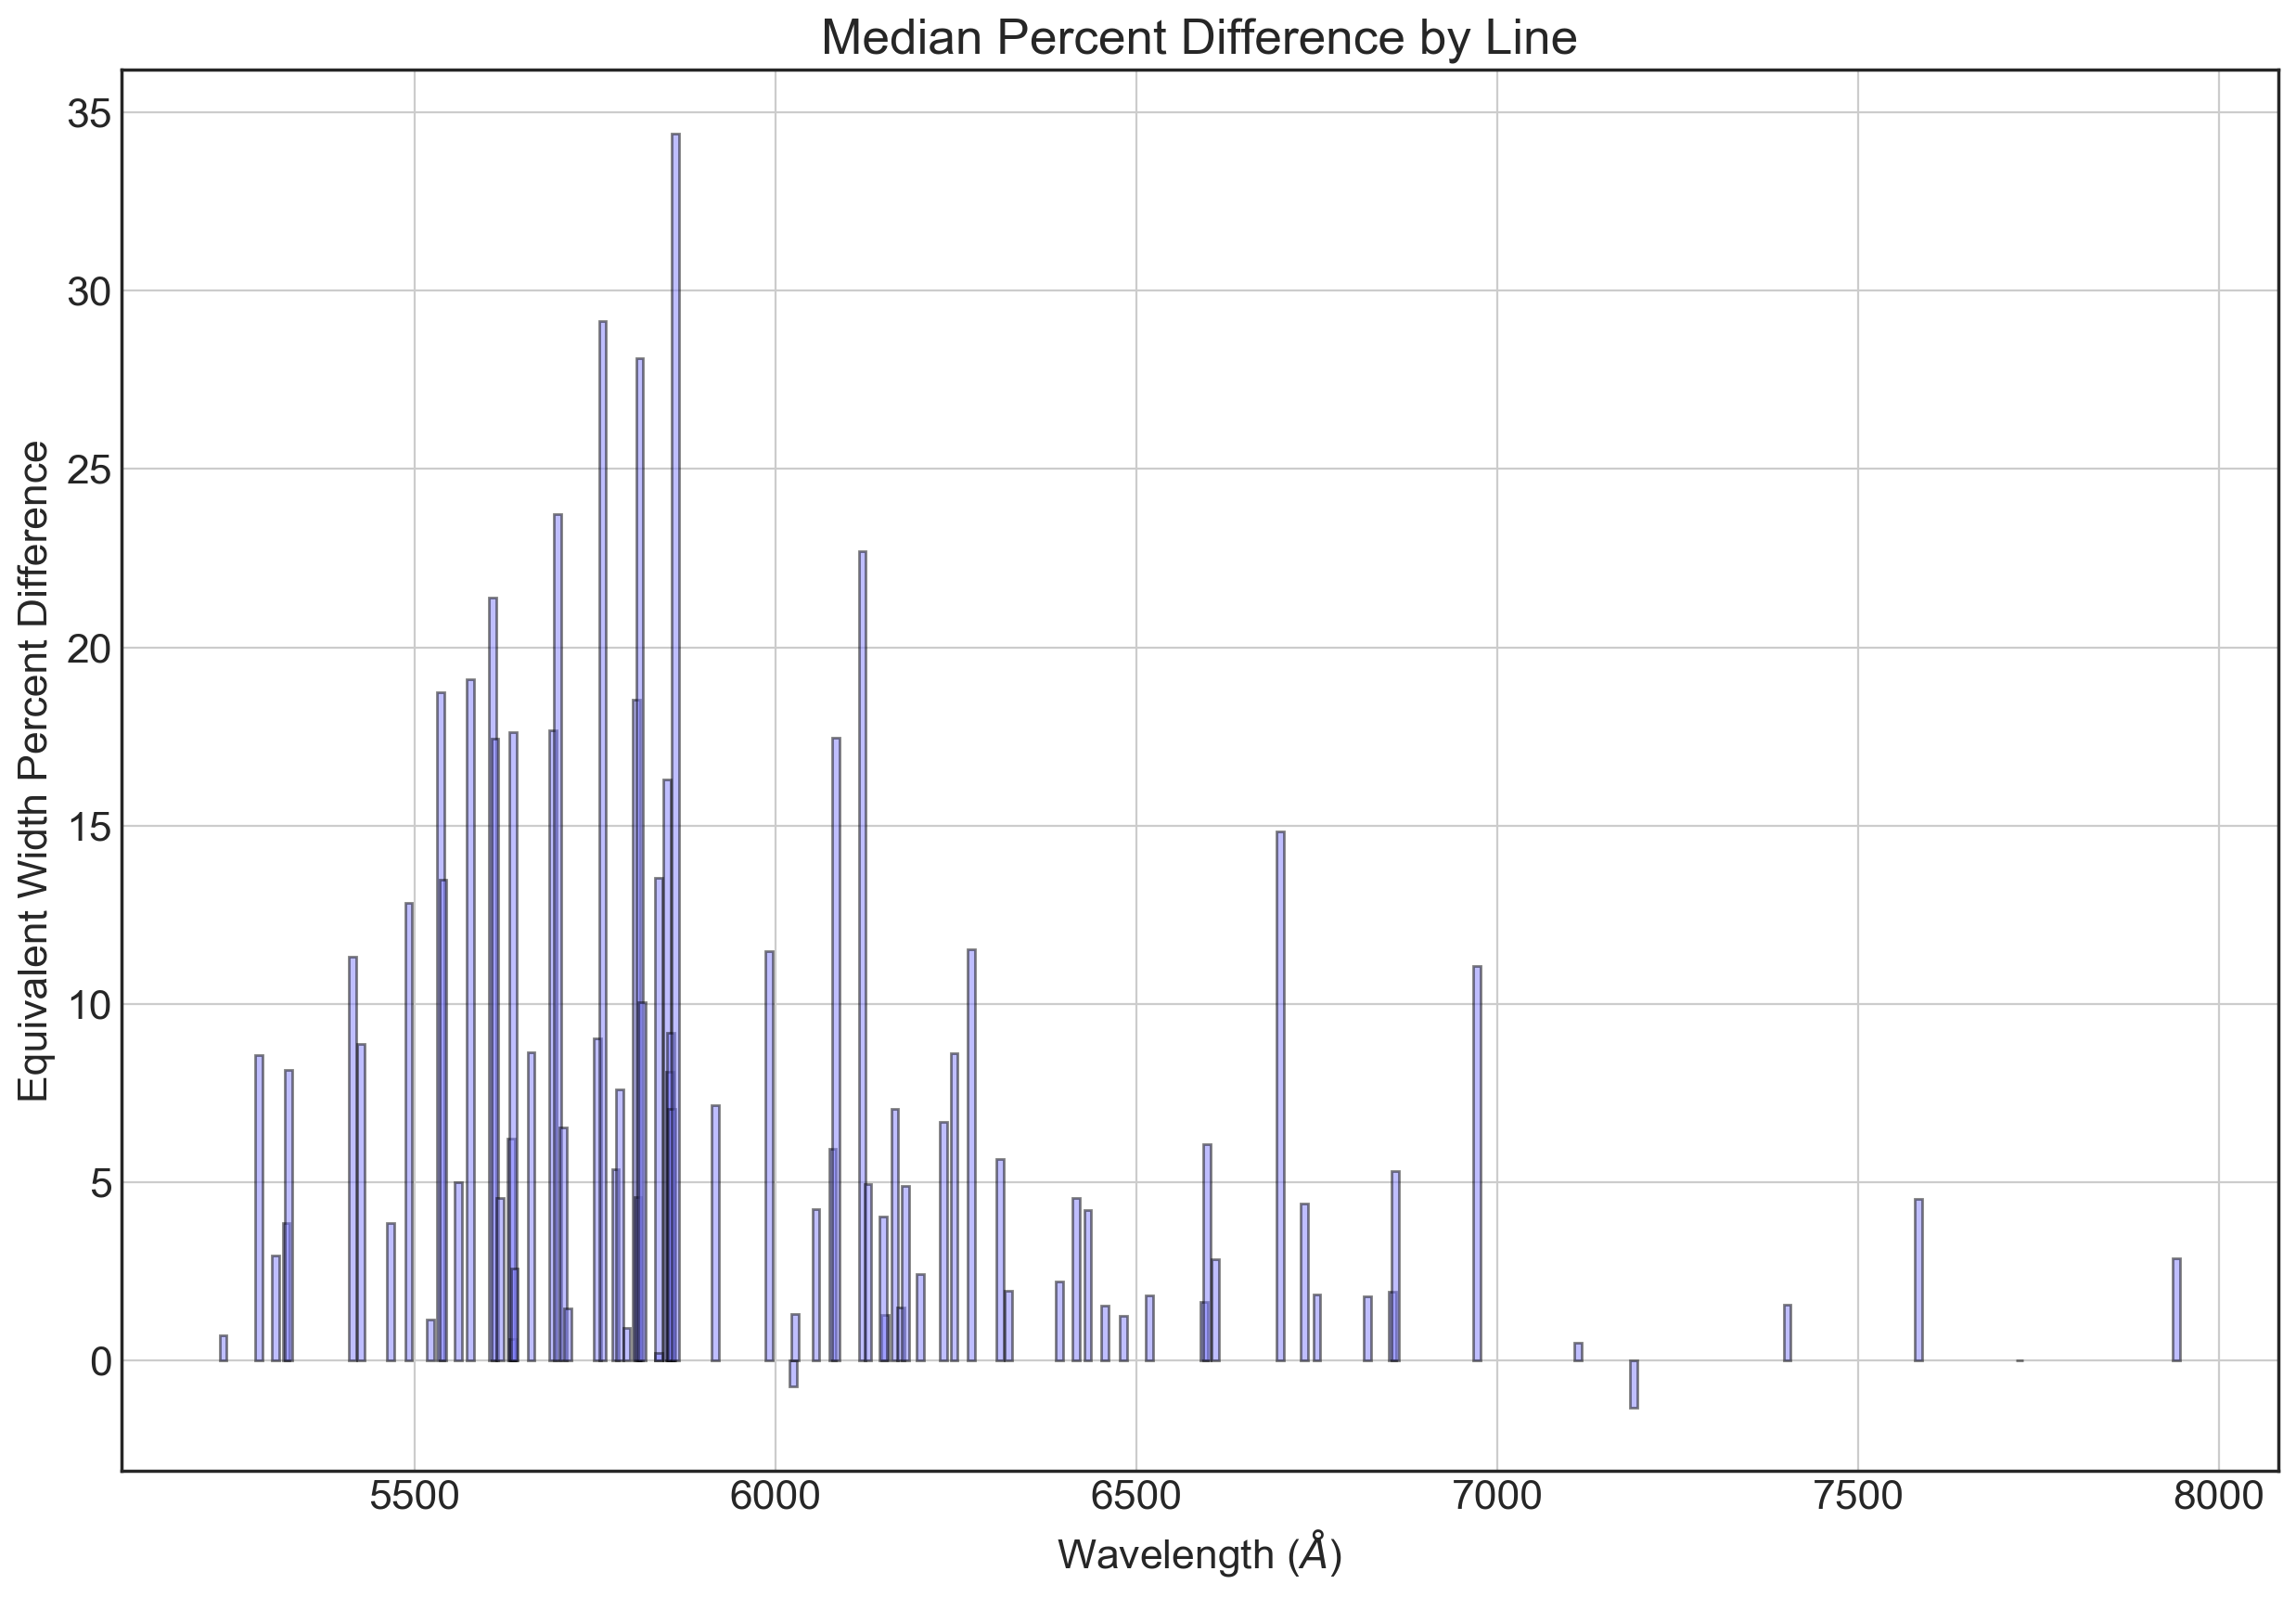

In [7]:
tame_outputs = glob.glob('tame-1.1.0/*4.aout')
byhand_outputs = ["tame-1.1.0/"+output.split('/')[-1].split('.')[0]+".ew" for output in tame_outputs]
output_labels = [output.split('/')[-1].split('.')[0] for output in tame_outputs]

fig = plt.figure(figsize=(15,10))
fig.dpi = 200
plt.grid()
plt.xlabel(r"Wavelength ($\AA$)")
plt.ylabel("Equivalent Width Percent Difference")
plt.title("Equivalent Width Agreement between TAME and By-Hand (Per Star)")
plt.ylim(-100,150)


color_idx = np.linspace(0, 1, len(tame_outputs))
pdiff_avg = []
for i,byhand_output, tame_output,label in zip(color_idx,byhand_outputs, tame_outputs,output_labels):
    ew_hand = pd.read_csv(byhand_output,delim_whitespace=True,header = None)
    ew_tame = pd.read_csv(tame_output,skiprows=1,delim_whitespace=True,header=None)
    hand_df = ew_hand[[0,4]]  # Wavelength and Equivalent Width
    tame_df = ew_tame[[0,4]]  # Wavelength and Equivalent Width
    np.array(hand_df[4])
    pdiff = ((np.array(tame_df[4])-np.array(hand_df[4]))/np.array(hand_df[4])) * 100
    pdiff_avg.append(pdiff)
    
    masked_pdiff = [val for val in pdiff if not np.isinf(val)]
    masked_wav = [wav for val,wav in zip(pdiff,hand_df[0]) if not np.isinf(val)]
    plt.plot(masked_wav,masked_pdiff,'.', color=plt.cm.cool(i), label=label)
    plt.axhline(np.mean(masked_pdiff), alpha=0.5, color=plt.cm.cool(i))
    #
    #print(np.mean(masked_pdiff),np.std(masked_pdiff))
plt.legend()
plt.savefig("rawtame_vs_hand.png")

zipped_pdiff = list(zip(*[pdiff for pdiff in pdiff_avg]))
masked_pdiff = [[val for val in pdiff if not np.isinf(val)] for pdiff in zipped_pdiff]
all_pdiff = np.concatenate( masked_pdiff, axis=0 )
print("Average Percent Difference: ", np.mean(all_pdiff))
#print(np.sum(abs(all_pdiff) > 10)/len(all_pdiff))
print("Fraction of Measurements with greater than 10% Difference:", np.sum(abs(all_pdiff) > 10)/len(all_pdiff))
pdiff_avg = [np.median(pdiff) for pdiff in masked_pdiff]

fig = plt.figure(figsize=(15,10))
fig.dpi = 200
plt.grid()
plt.bar(hand_df[0], pdiff_avg, align='center', alpha=0.5,width=10,color = plt.cm.cool(0.5),ec='k')
plt.xlabel(r"Wavelength ($\AA$)")
plt.ylabel("Equivalent Width Percent Difference")
plt.title("Median Percent Difference by Line")


# Specific Issue Lines
print("Fraction of Lines with greater than 5% Difference:", len(np.array(hand_df[0])[abs(np.array(pdiff_avg)) >5])/len(hand_df[0]))
print("Fraction of Lines with greater than 10% Difference:", len(np.array(hand_df[0])[abs(np.array(pdiff_avg)) >10])/len(hand_df[0]))
print("Lines with greater than 20% Difference:",np.array(hand_df[0])[abs(np.array(pdiff_avg)) >20])
print("Lines with greater than 30% Difference:",np.array(hand_df[0])[abs(np.array(pdiff_avg)) >30])

## Calibrated Comparison

Average Percent Difference:  1.91878920193
Fraction of Measurements within uncertainties:  0.697962798937
Fraction of Measurements with greater than 5% Difference: 0.357838795394
Fraction of Measurements with greater than 10% Difference: 0.156775907883
Fraction of Lines with greater than 5% Difference: 0.047619047619047616
Lines with greater than 20% Difference: [ 5849.68]


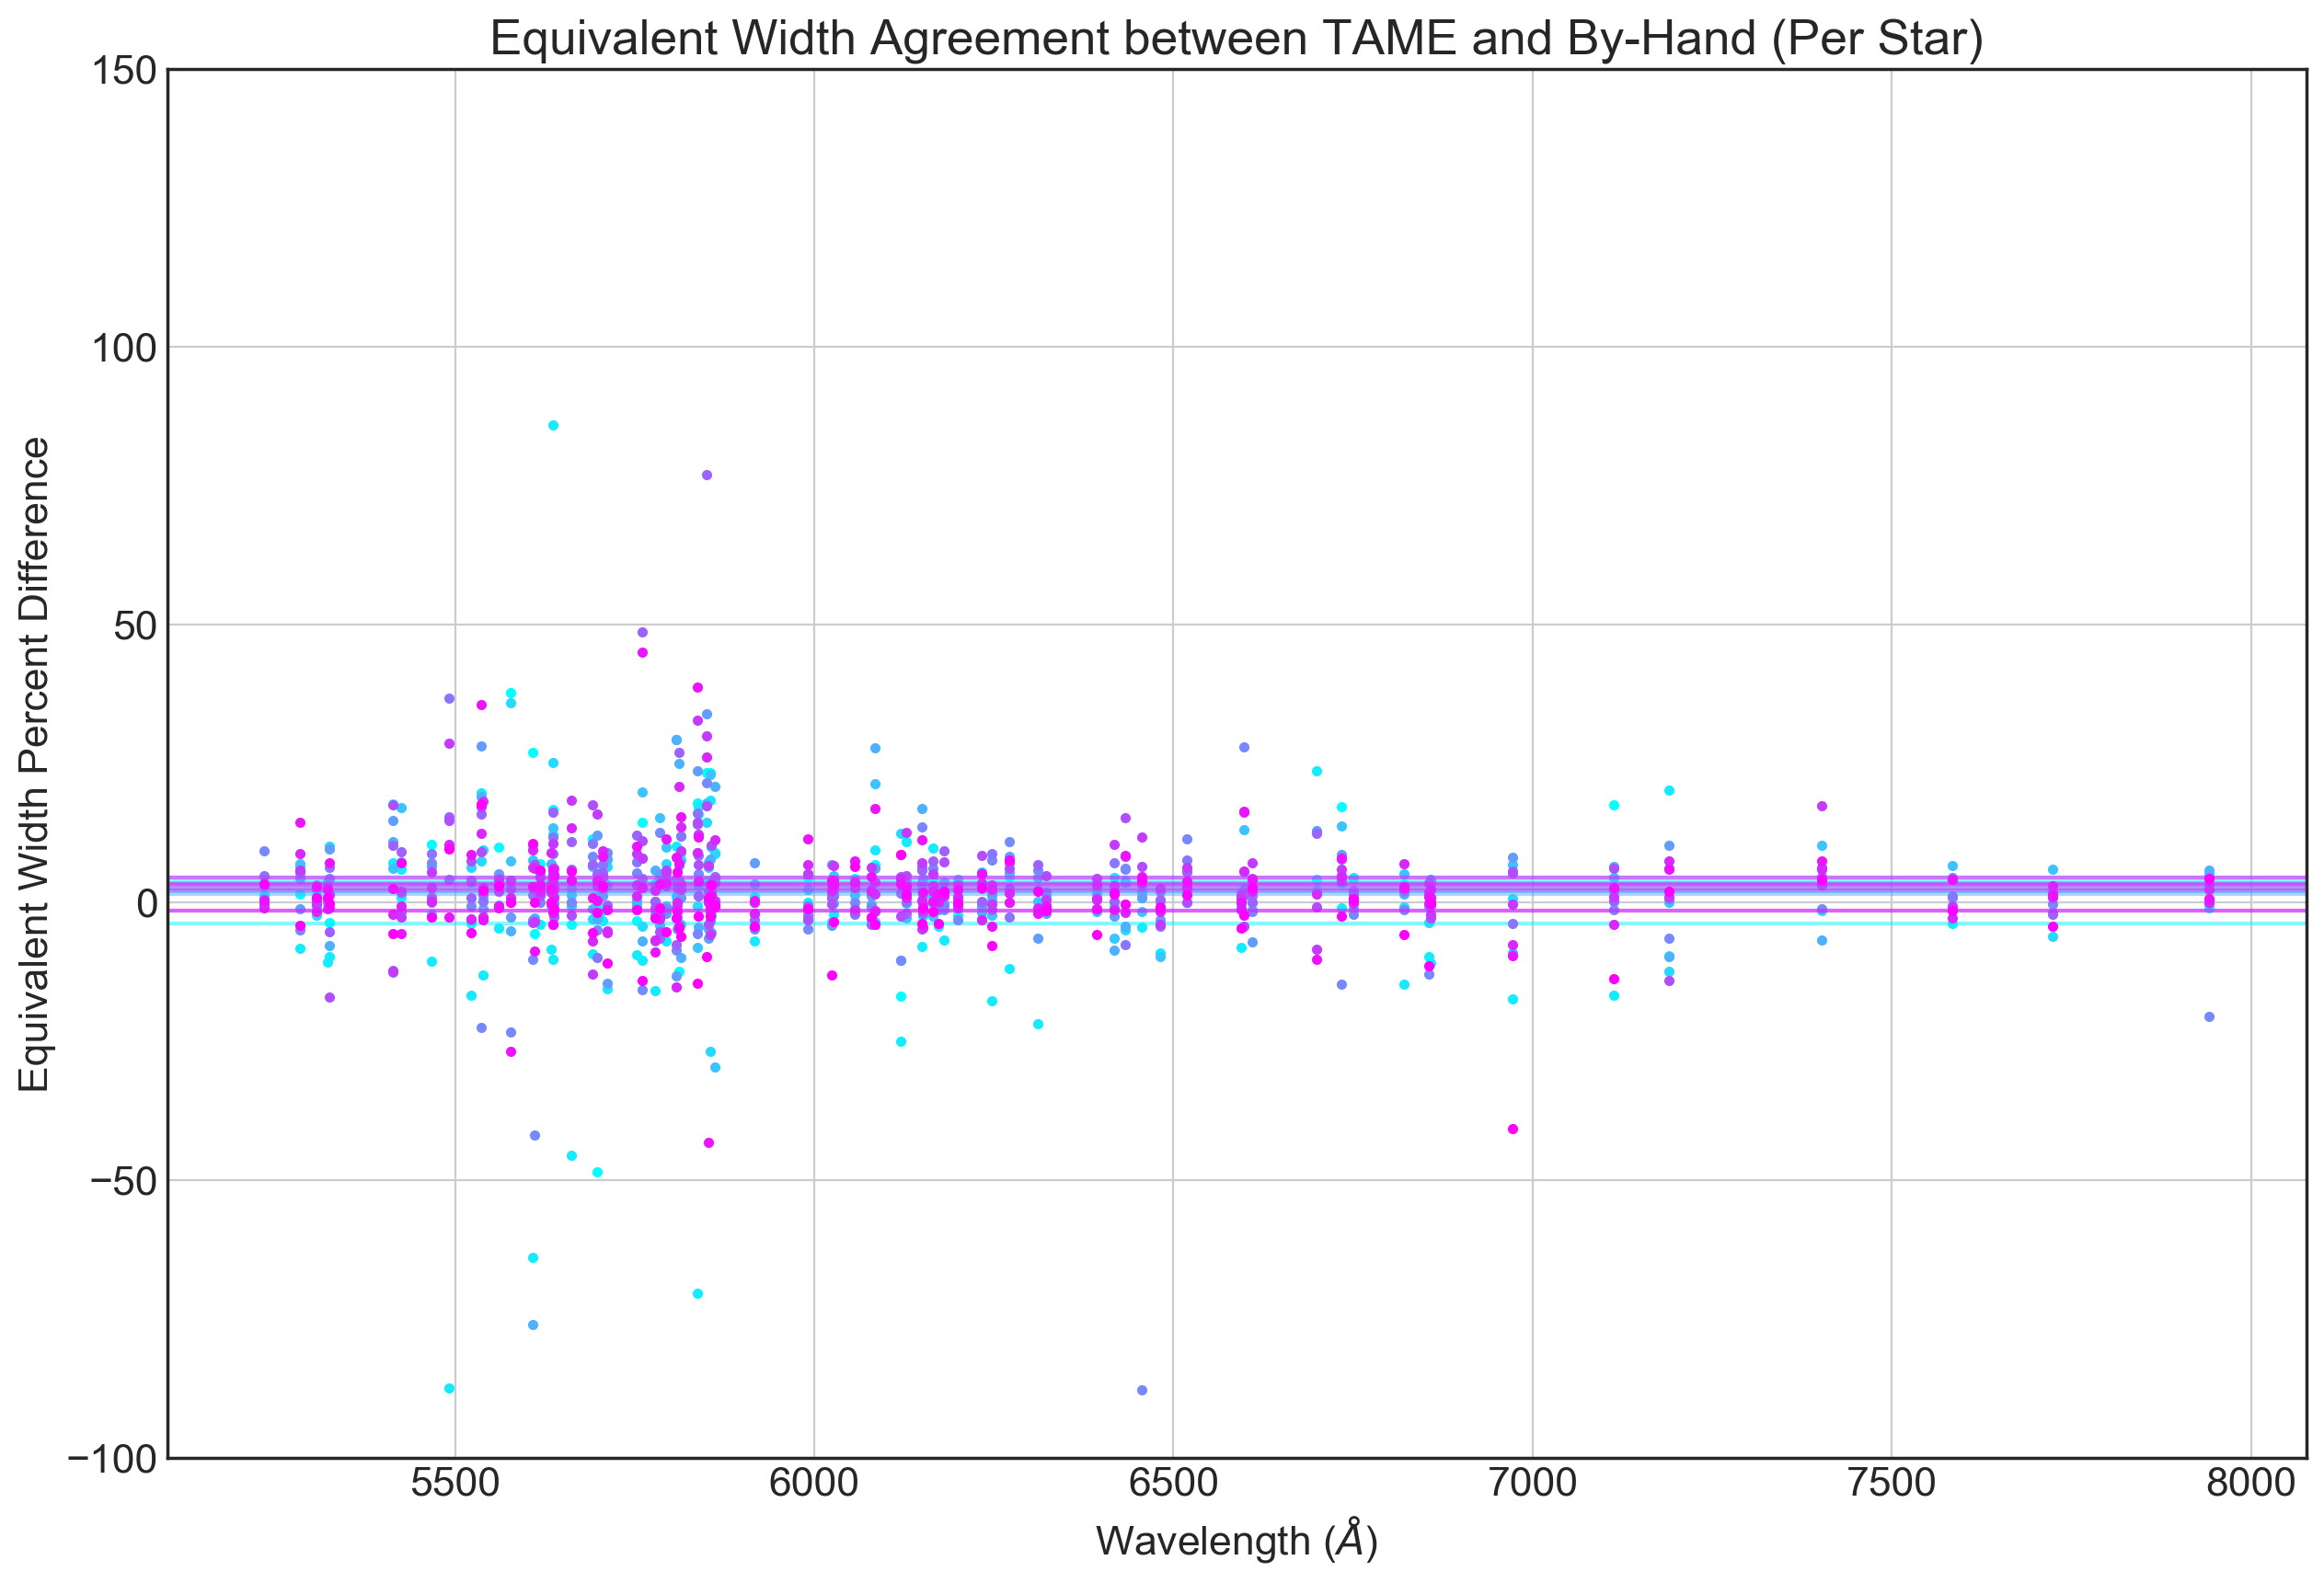

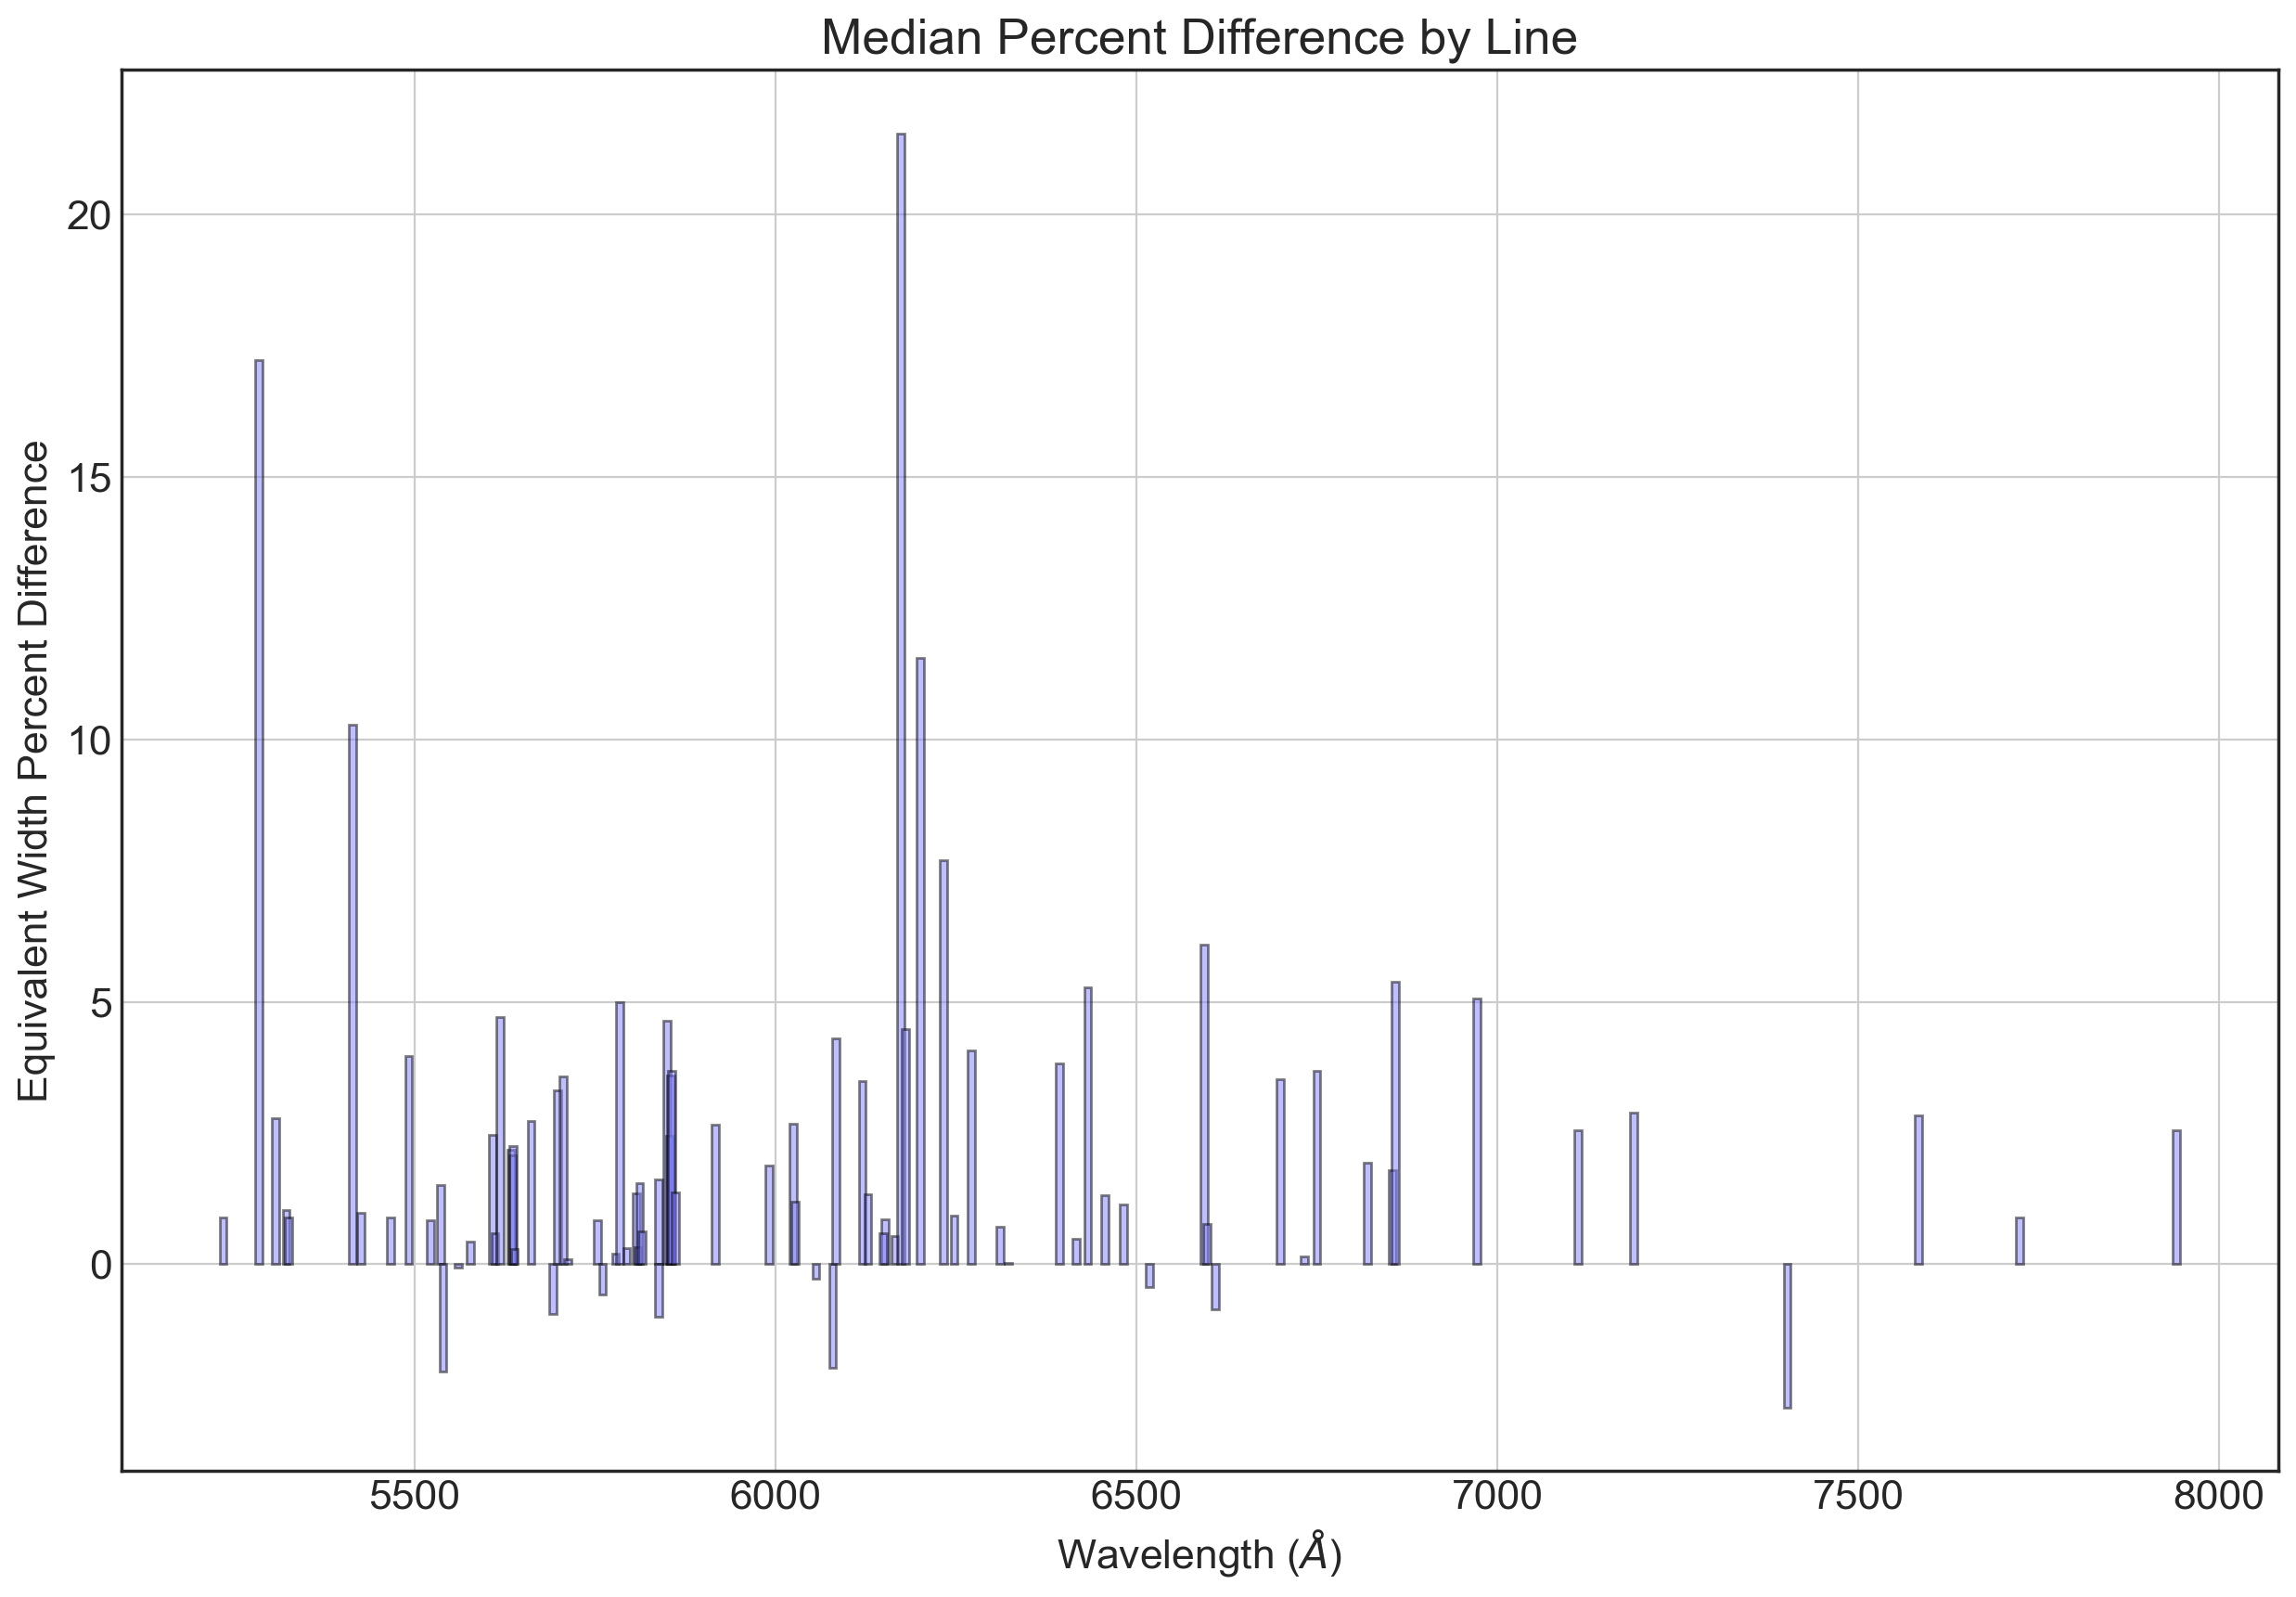

In [9]:
tame_outputs = glob.glob('data/ew_known/equiv_widths/ngc2506*.ew') + glob.glob('data/ew_known/equiv_widths/col110*.ew')
#tame_outputs = glob.glob('data/equiv_widths/*.ew')
byhand_outputs = ['data/ew_known/tame_inputs/'+output.split('/')[-1] for output in tame_outputs]
output_labels = [output.split('/')[-1].split('.')[0] for output in tame_outputs]


fig = plt.figure(figsize=(15,10))
fig.dpi = 200
plt.grid()
plt.xlabel(r"Wavelength ($\AA$)")
plt.ylabel("Equivalent Width Percent Difference")
plt.title("Equivalent Width Agreement between TAME and By-Hand (Per Star)")
plt.ylim(-100,150)


color_idx = np.linspace(0, 1, len(tame_outputs))
pdiff_avg = []
avg_unc = []
lineshift_avg = []
agree_num = 0
for i,byhand_output, tame_output,label in zip(color_idx,byhand_outputs, tame_outputs,output_labels):
    
    #Bad Stars -- affected particularly badly by TAME line recognition issue
    if tame_output not in glob.glob("data/equiv_widths/*2129*") + glob.glob("data/equiv_widths/*3122*"):
        pass
    ew_hand = pd.read_csv(byhand_output,delim_whitespace=True,header = None)
    ew_tame = pd.read_csv(tame_output,skiprows=1,delim_whitespace=True,header=None)
    #print(ew_tame)
    hand_df = ew_hand[[0,4]].sort_values(by=0, ascending=False) # Wavelength and Equivalent Width
    tame_df = ew_tame # Wavelength, Equivalent Width, and linecenter
    #print(tame_df)
    
    sync = np.array(hand_df[0]) - np.array(tame_df[0])
    pdiff = ((np.array(tame_df[1])-np.array(hand_df[4]))/np.array(hand_df[4])) * 100
    #pdiff = np.array(tame_df[1]) - np.array(hand_df[4])
    agree_num += np.sum(abs(np.array(tame_df[1]) - np.array(hand_df[4])) <= tame_df[2])
    pdiff_avg.append(pdiff)
    
    
    #print(pdiff_avg)
    
    masked_pdiff = [val for val in pdiff if not np.isinf(val) and not (np.isnan(val))]
    masked_wav = [wav for val,wav in zip(pdiff,hand_df[0]) if not np.isinf(val) and not (np.isnan(val))]
    #masked_unc = [unc for val,unc in zip(pdiff,pdiff_unc) if not np.isinf(val) and not (np.isnan(val))]
    plt.plot(masked_wav,masked_pdiff, '.', color=plt.cm.cool(i), label=label)
    #plt.plot(tame_df[0],pdiff,'.', color=plt.cm.cool(i), label=label)
    plt.axhline(np.mean(masked_pdiff), alpha=0.5, color=plt.cm.cool(i))
    #
    #print(np.mean(masked_pdiff),np.std(masked_pdiff))
#plt.legend()    

zipped_pdiff = list(zip(*[pdiff for pdiff in pdiff_avg]))
masked_pdiff = [[val for val in pdiff if not np.isinf(val) and not (np.isnan(val))] for pdiff in zipped_pdiff]
all_pdiff = np.concatenate( masked_pdiff, axis=0 )
print("Average Percent Difference: ", np.mean(all_pdiff))
print("Fraction of Measurements within uncertainties: ", agree_num/len(all_pdiff))
print("Fraction of Measurements with greater than 5% Difference:", np.sum(abs(all_pdiff) > 5)/len(all_pdiff))
print("Fraction of Measurements with greater than 10% Difference:", np.sum(abs(all_pdiff) > 10)/len(all_pdiff))
pdiff_avg = [np.median(pdiff) for pdiff in masked_pdiff]



fig = plt.figure(figsize=(15,10))
fig.dpi = 200
plt.grid()
plt.bar(hand_df[0], pdiff_avg, align='center', alpha=0.5,width=10,color = plt.cm.cool(0.5),ec='k')
plt.xlabel(r"Wavelength ($\AA$)")
plt.ylabel("Equivalent Width Percent Difference")
plt.title("Median Percent Difference by Line")

# Specific Issue Lines
print("Fraction of Lines with greater than 5% Difference:", len(np.array(hand_df[0])[abs(np.array(pdiff_avg)) >10])/len(hand_df[0]))
print("Lines with greater than 20% Difference:",np.array(hand_df[0])[abs(np.array(pdiff_avg)) >20])

Average mA Difference:  1.41426086957
Fraction of Measurements within uncertainties:  0.685217391304
Fraction of Measurements with greater than 5mA Difference: 0.175652173913
Fraction of Measurements with greater than 10mA Difference: 0.044347826087
Fraction of Lines with greater than 5 mA Difference: 0.011904761904761904
Lines with greater than 5 mA Difference: []


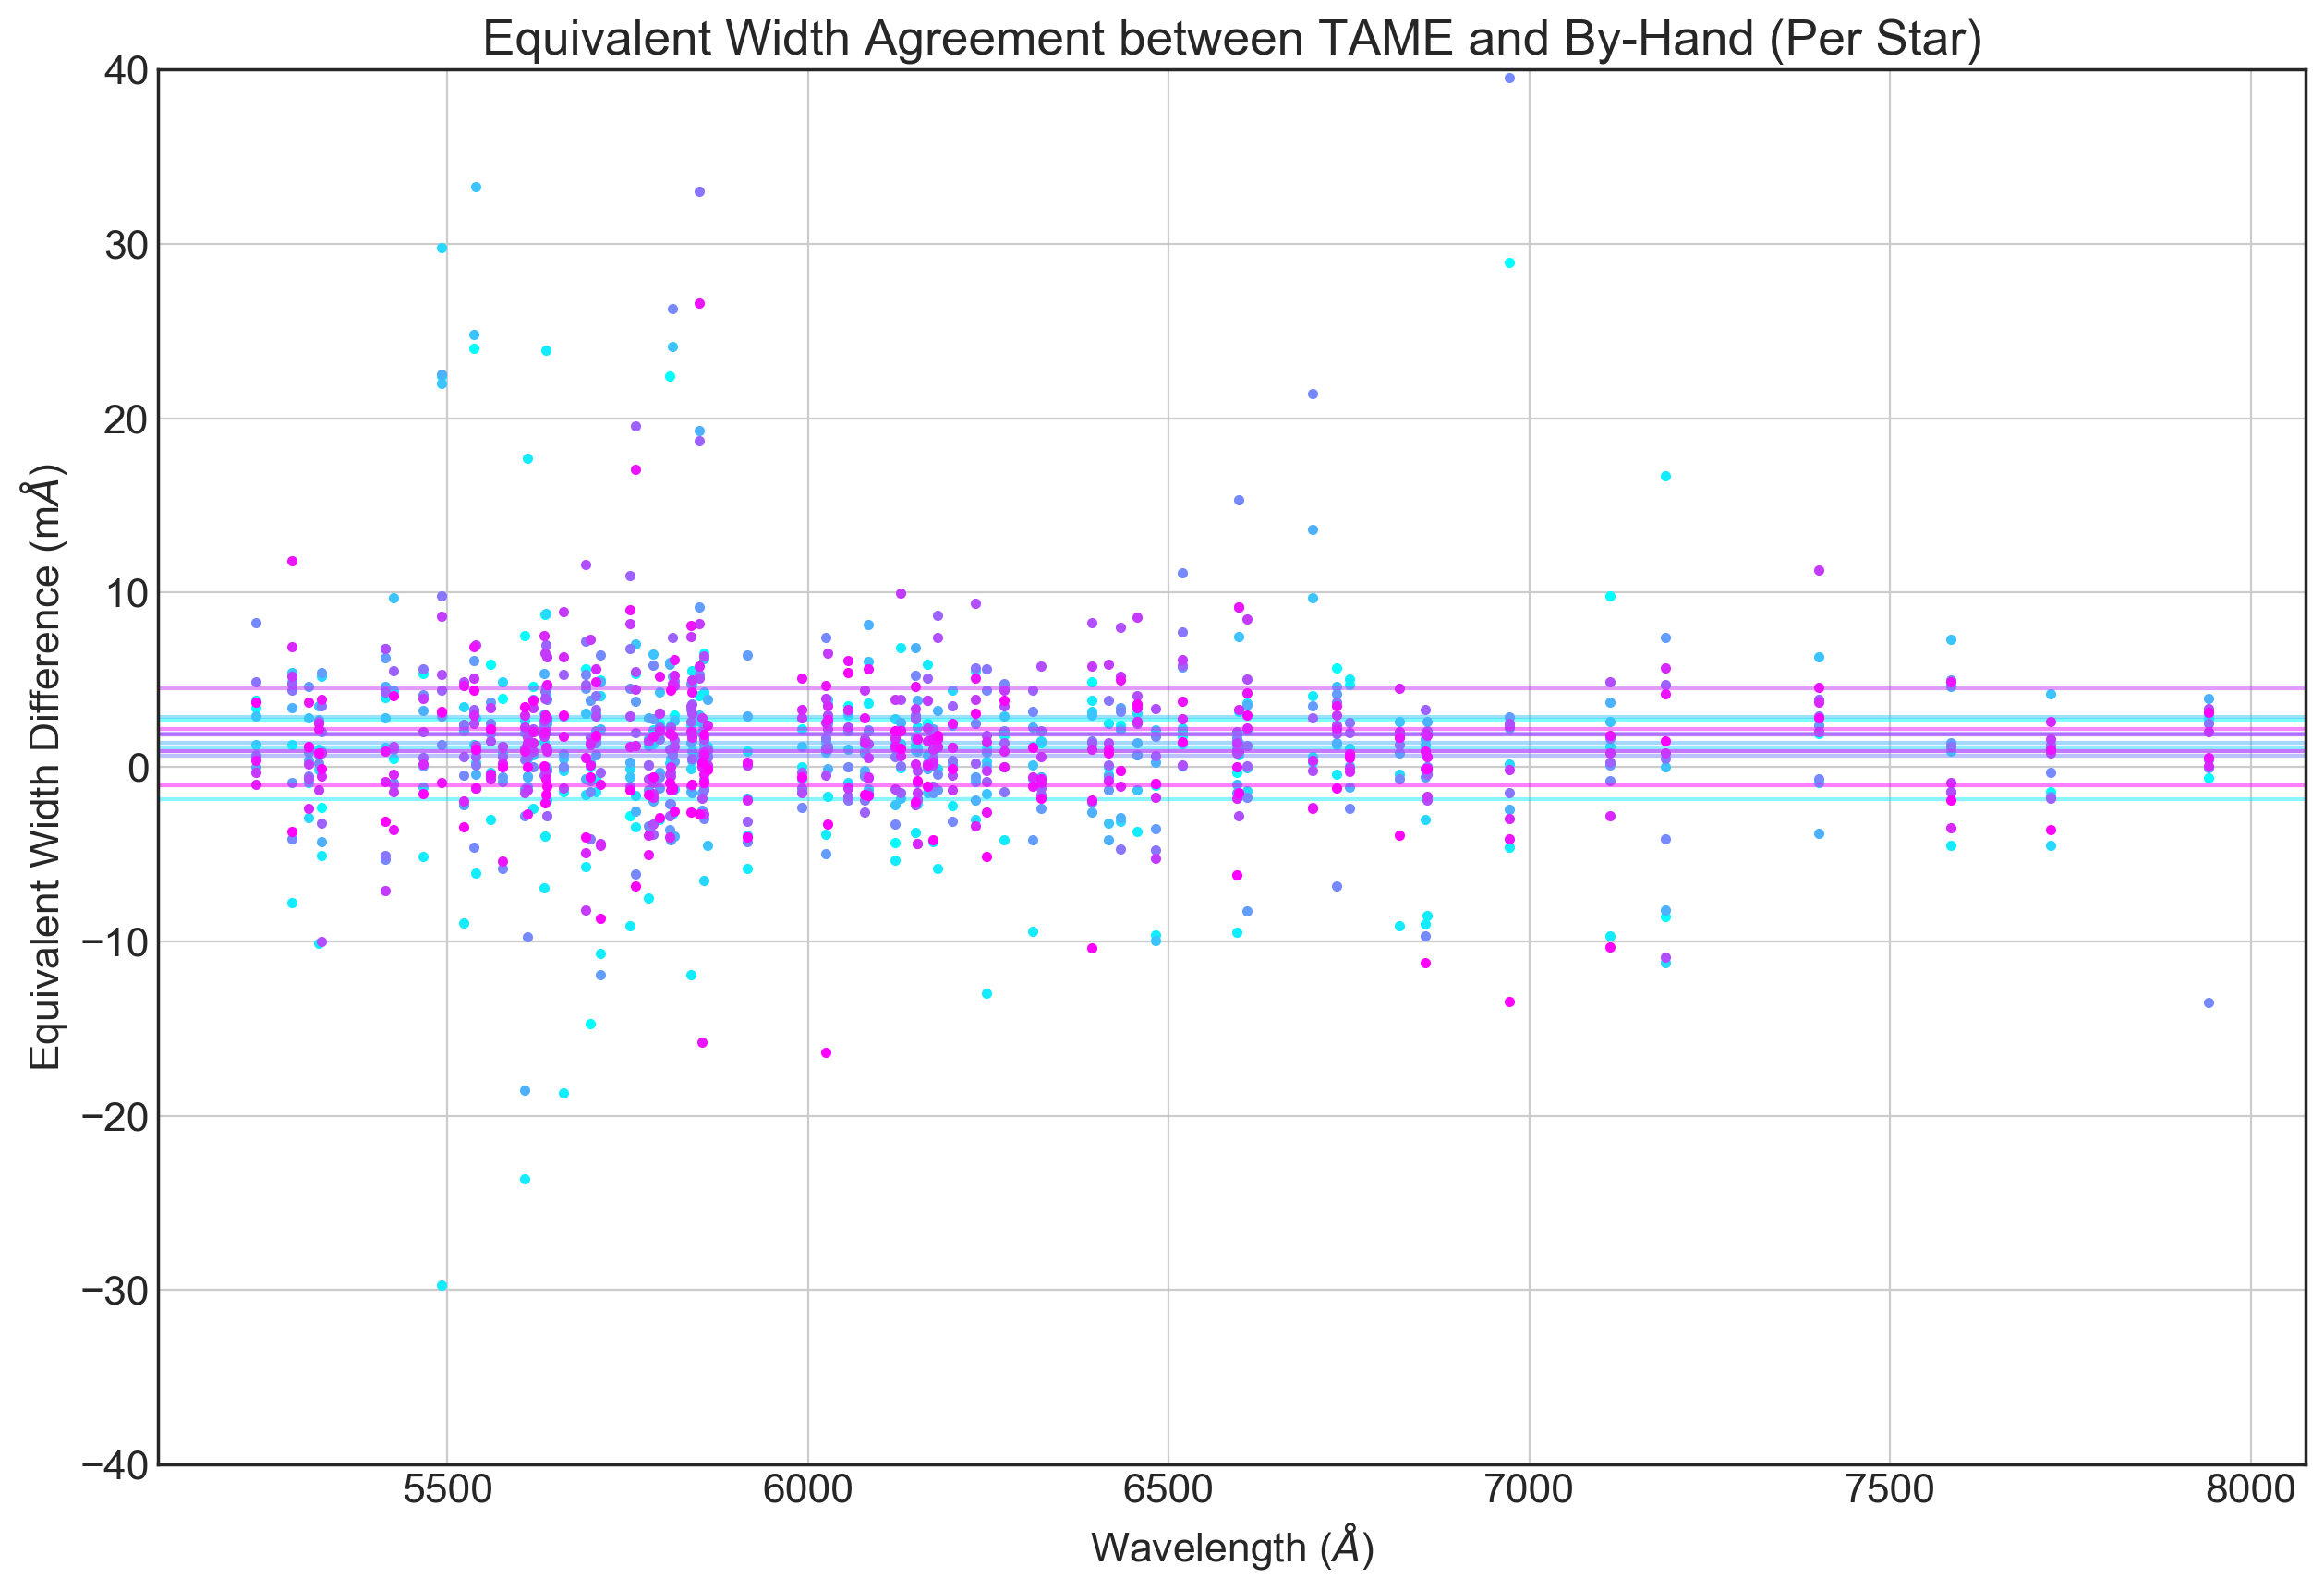

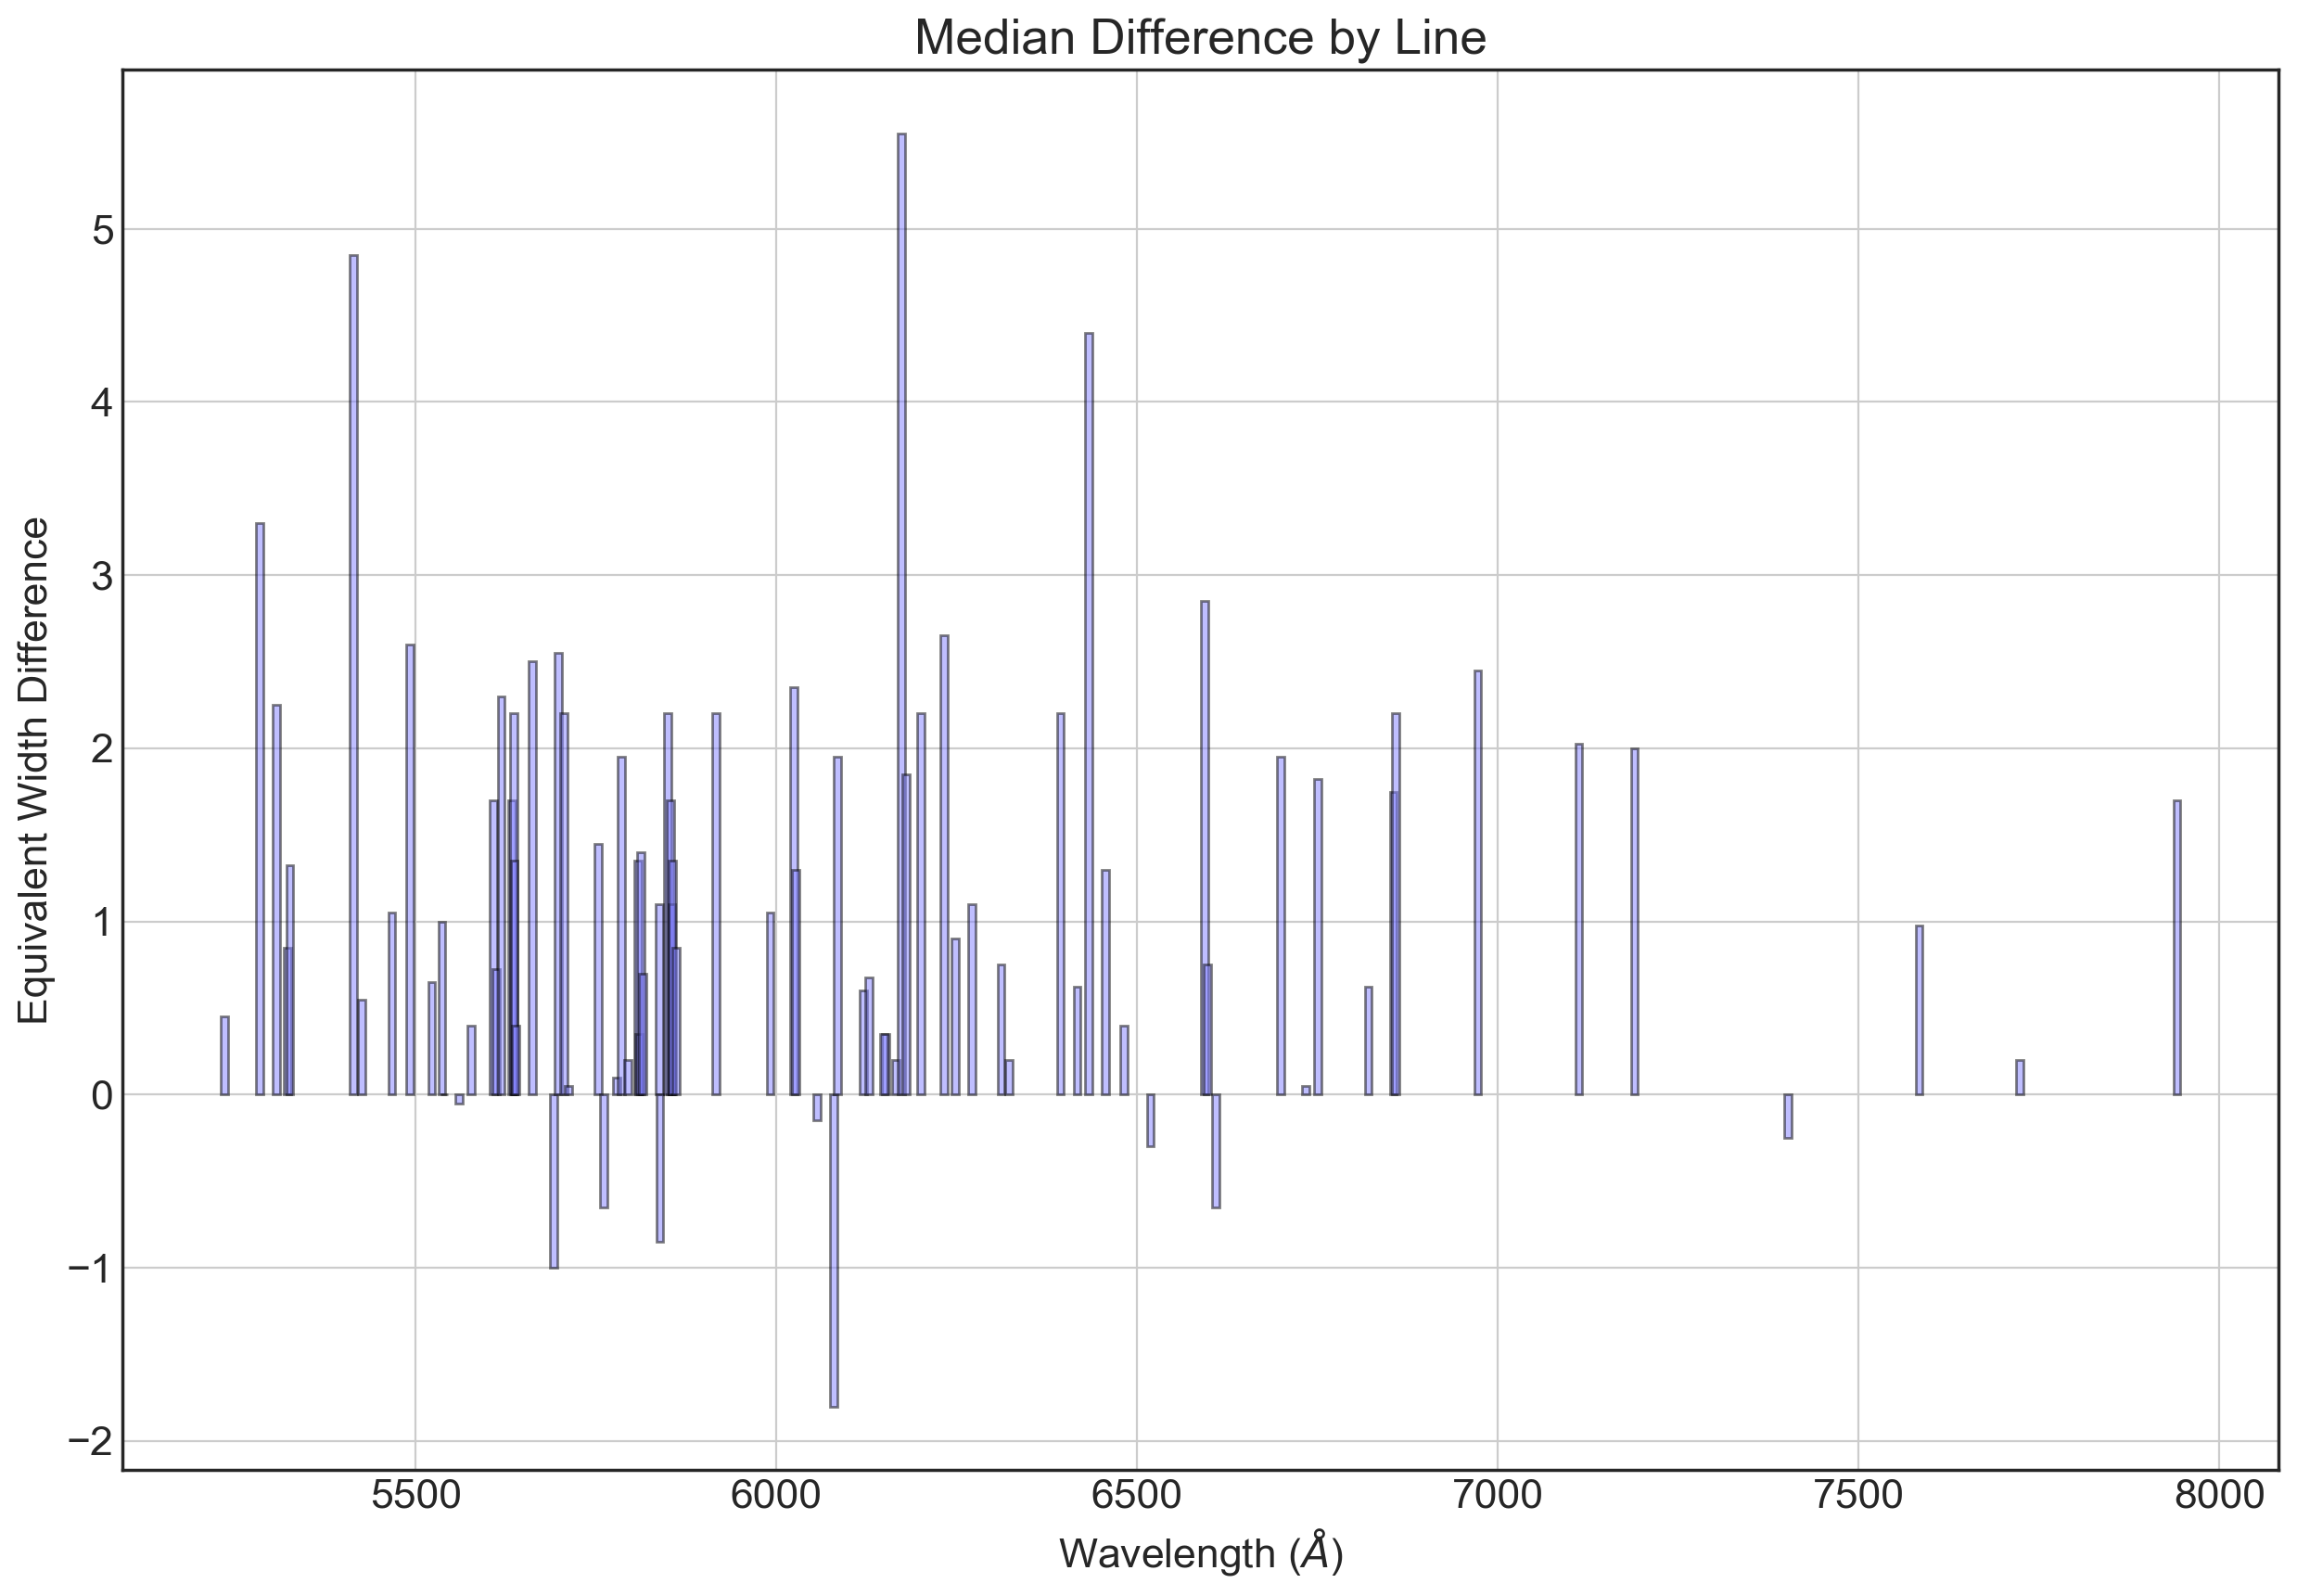

In [46]:
tame_outputs = glob.glob('data/ew_known/equiv_widths/ngc2506*.ew') + glob.glob('data/ew_known/equiv_widths/col110*.ew')
#tame_outputs = glob.glob('data/ew_known/equiv_widths/*.ew')
byhand_outputs = ['data/ew_known/tame_inputs/'+output.split('/')[-1] for output in tame_outputs]
output_labels = [output.split('/')[-1].split('.')[0] for output in tame_outputs]


fig = plt.figure(figsize=(15,10))
fig.dpi = 200
plt.grid()
plt.xlabel(r"Wavelength ($\AA$)")
plt.ylabel("Equivalent Width Difference (m$\AA$)")
plt.title("Equivalent Width Agreement between TAME and By-Hand (Per Star)")
plt.ylim(-40,40)


color_idx = np.linspace(0, 1, len(tame_outputs))
pdiff_avg = []
avg_unc = []
lineshift_avg = []
agree_num = 0
for i,byhand_output, tame_output,label in zip(color_idx,byhand_outputs, tame_outputs,output_labels):
    
    #Bad Stars -- affected particularly badly by TAME line recognition issue
    if tame_output not in glob.glob("data/equiv_widths/*2129*") + glob.glob("data/equiv_widths/*3122*"):
        pass
    ew_hand = pd.read_csv(byhand_output,delim_whitespace=True,header = None)
    ew_tame = pd.read_csv(tame_output,skiprows=1,delim_whitespace=True,header=None)
    #print(ew_tame)
    hand_df = ew_hand[[0,4]].sort_values(by=0, ascending=False) # Wavelength and Equivalent Width
    tame_df = ew_tame # Wavelength, Equivalent Width, and linecenter
    #print(tame_df)
    
    sync = np.array(hand_df[0]) - np.array(tame_df[0])
    pdiff = np.array(tame_df[1]) - np.array(hand_df[4])
    pdiff_unc = np.array(tame_df[2])
    agree_num += np.sum(abs(np.array(tame_df[1]) - np.array(hand_df[4])) <= tame_df[2])
    pdiff_avg.append(pdiff)
    
    
    #print(pdiff_avg)
    
    masked_pdiff = [val for val in pdiff if not np.isinf(val) and not (np.isnan(val))]
    masked_wav = [wav for val,wav in zip(pdiff,hand_df[0]) if not np.isinf(val) and not (np.isnan(val))]
    masked_unc = [unc for val,unc in zip(pdiff,pdiff_unc) if not np.isinf(val) and not (np.isnan(val))]
    plt.plot(masked_wav,masked_pdiff, '.', color=plt.cm.cool(i), label=label)
    #plt.errorbar(masked_wav,masked_pdiff, yerr = masked_unc, fmt =  '.', color=plt.cm.cool(i), label=label)
    #plt.plot(tame_df[0],pdiff,'.', color=plt.cm.cool(i), label=label)
    plt.axhline(np.mean(masked_pdiff), alpha=0.5, color=plt.cm.cool(i))
    #
    #print(np.mean(masked_pdiff),np.std(masked_pdiff))
#plt.legend()    

zipped_pdiff = list(zip(*[pdiff for pdiff in pdiff_avg]))
masked_pdiff = [[val for val in pdiff if not np.isinf(val) and not (np.isnan(val))] for pdiff in zipped_pdiff]
all_pdiff = np.concatenate( masked_pdiff, axis=0 )
print("Average mA Difference: ", np.mean(all_pdiff))
print("Fraction of Measurements within uncertainties: ", agree_num/len(all_pdiff))
print("Fraction of Measurements with greater than 5mA Difference:", np.sum(abs(all_pdiff) > 5)/len(all_pdiff))
print("Fraction of Measurements with greater than 10mA Difference:", np.sum(abs(all_pdiff) > 10)/len(all_pdiff))
pdiff_avg = [np.median(pdiff) for pdiff in masked_pdiff]



fig = plt.figure(figsize=(15,10))
fig.dpi = 200
plt.grid()
plt.bar(hand_df[0], pdiff_avg, align='center', alpha=0.5,width=10,color = plt.cm.cool(0.5),ec='k')
plt.xlabel(r"Wavelength ($\AA$)")
plt.ylabel("Equivalent Width Difference")
plt.title("Median Difference by Line")

# Specific Issue Lines
print(r"Fraction of Lines with greater than 5 mA Difference:", len(np.array(hand_df[0])[abs(np.array(pdiff_avg)) >5])/len(hand_df[0]))
print(r"Lines with greater than 5 mA Difference:",np.array(hand_df[0])[abs(np.array(pdiff_avg)) >20])

Average Percent Difference:  nan
Fraction of Measurements with greater than 10% Difference: 0.153246753247


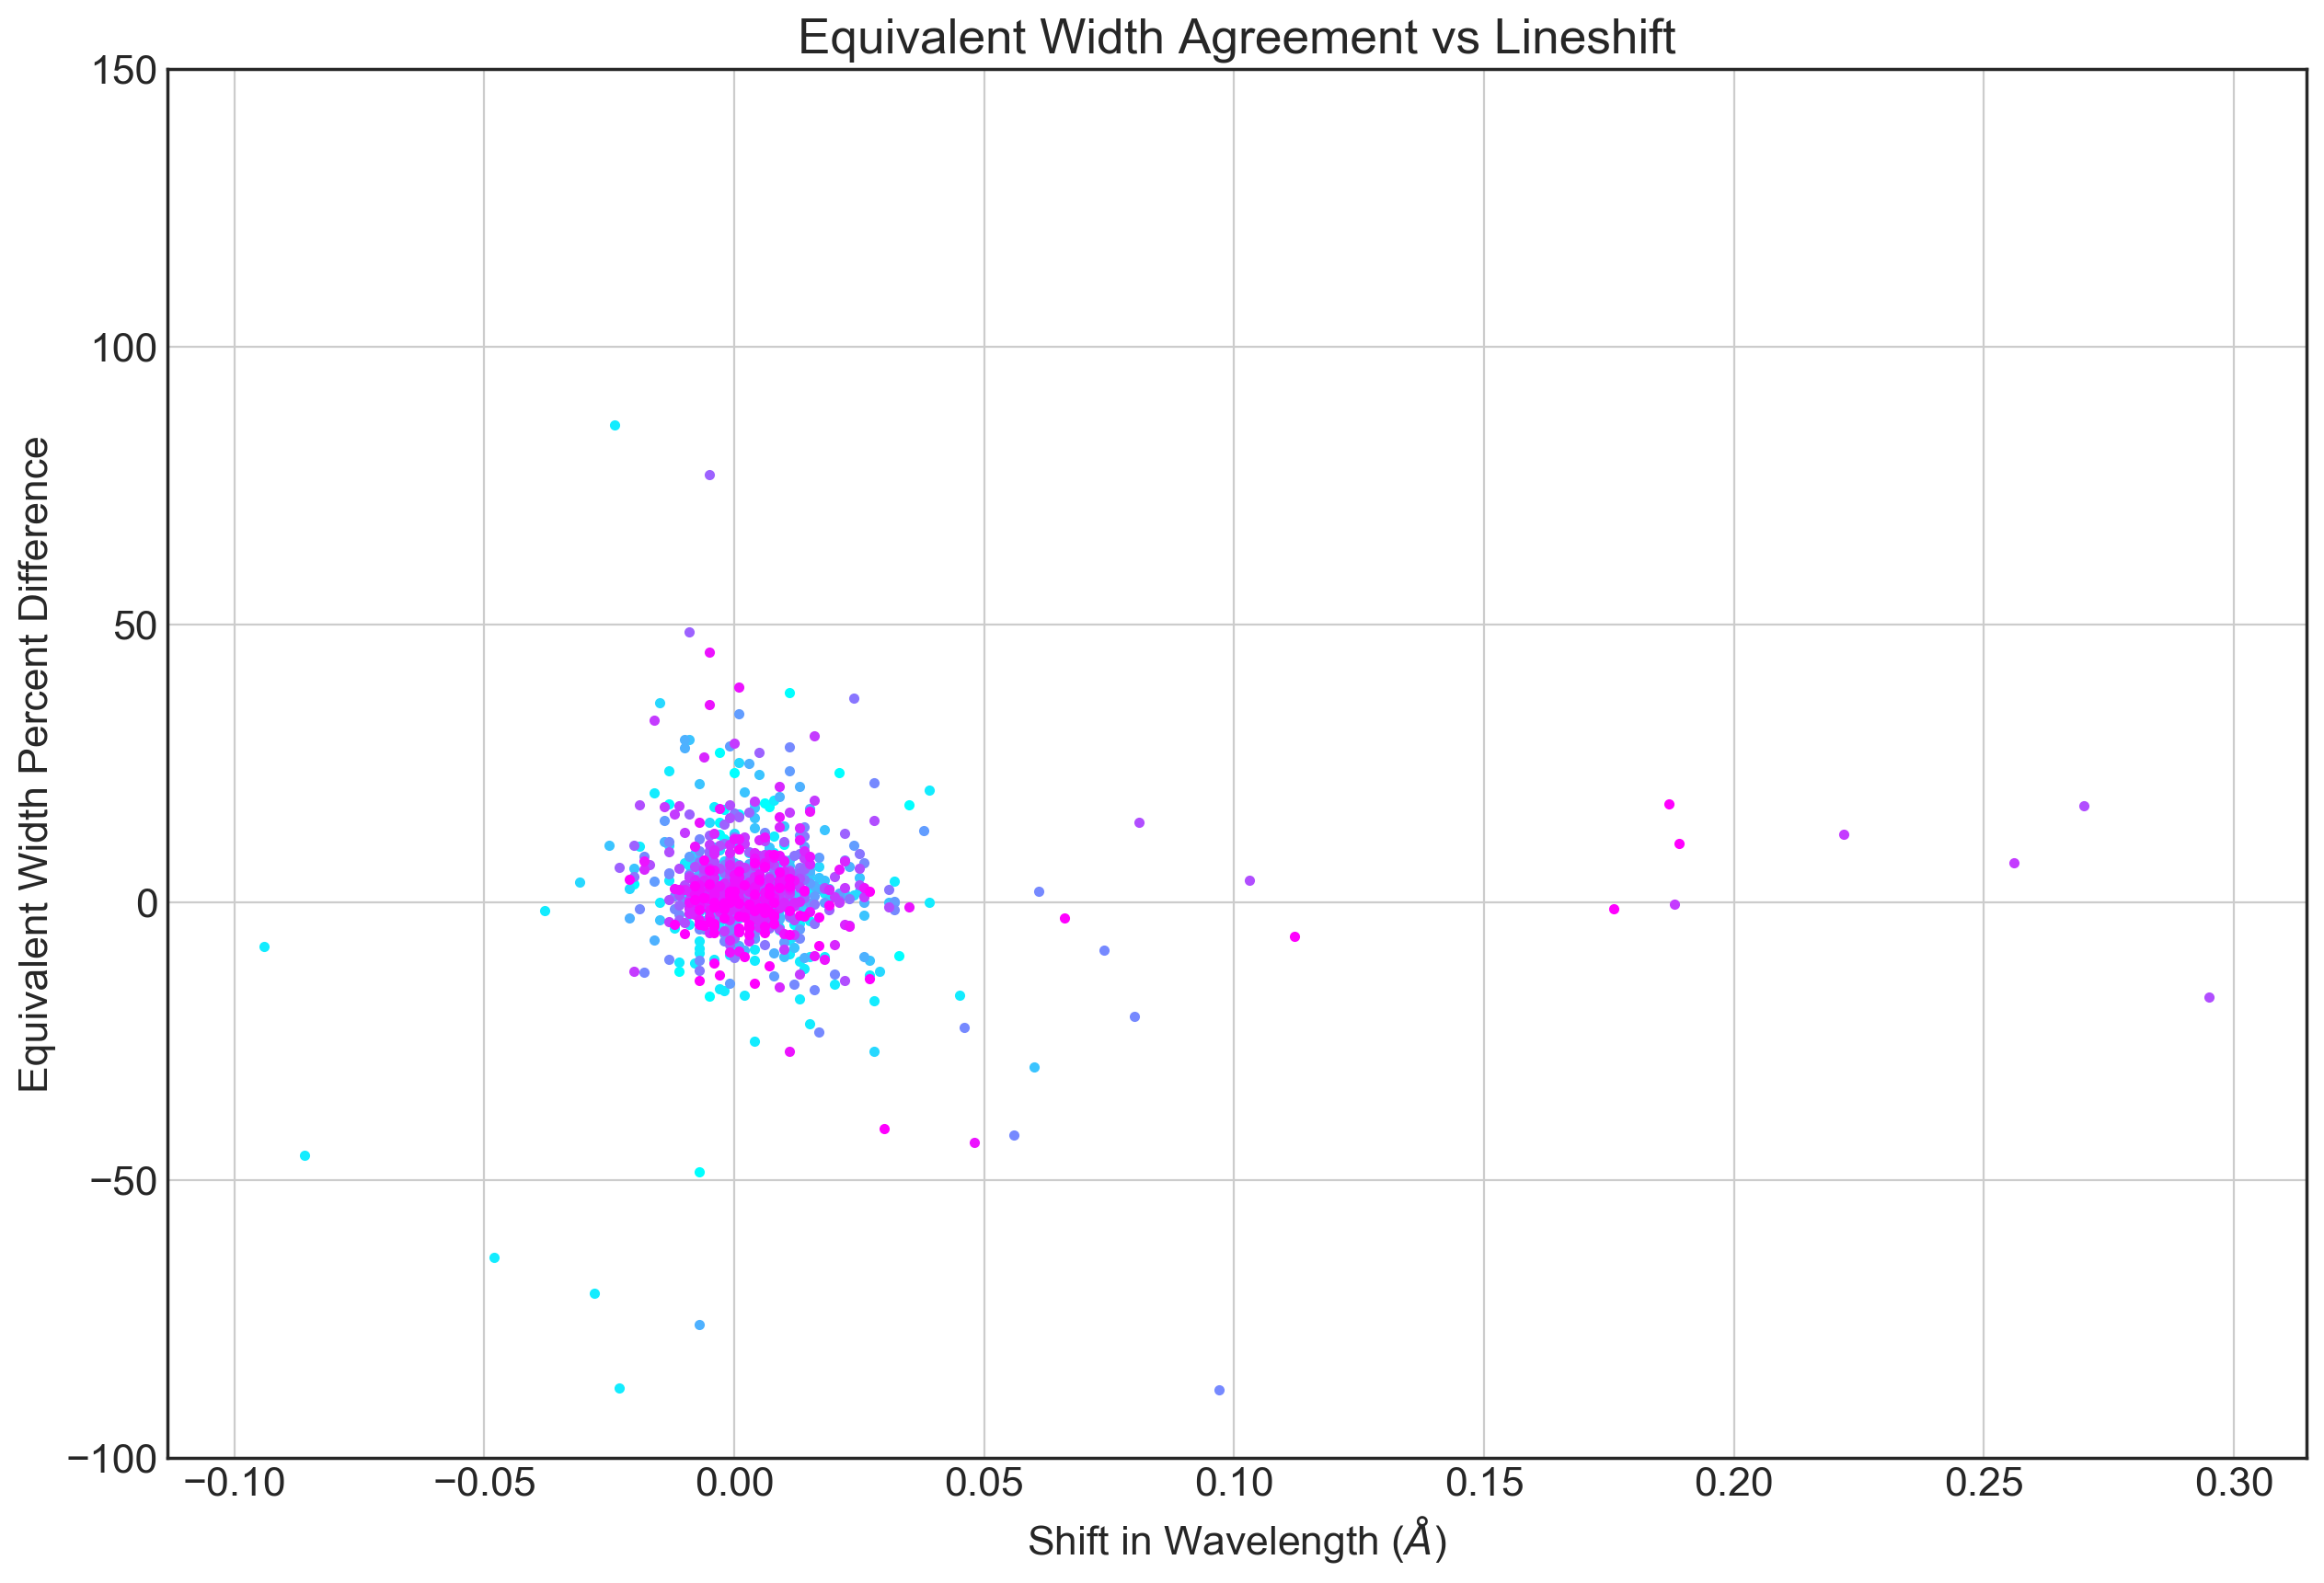

In [110]:
tame_outputs = glob.glob('data/equiv_widths/ngc2506*.ew') + glob.glob('data/equiv_widths/col110*.ew')
#tame_outputs = glob.glob('data/equiv_widths/*.ew')
byhand_outputs = ['data/tame_inputs/'+output.split('/')[-1] for output in tame_outputs]
output_labels = [output.split('/')[-1].split('.')[0] for output in tame_outputs]


fig = plt.figure(figsize=(15,10))
fig.dpi = 200
plt.grid()
plt.xlabel(r"Shift in Wavelength ($\AA$)")
plt.ylabel("Equivalent Width Percent Difference")
plt.title("Equivalent Width Agreement vs Lineshift")
plt.ylim(-100,150)


color_idx = np.linspace(0, 1, len(tame_outputs))
pdiff_avg = []
avg_unc = []
lineshift_avg = []
for i,byhand_output, tame_output,label in zip(color_idx,byhand_outputs, tame_outputs,output_labels):
    
    #Bad Stars -- affected particularly badly by TAME line recognition issue
    if tame_output in glob.glob("data/equiv_widths/*2129*") + glob.glob("data/equiv_widths/*3122*"):
        pass
    ew_hand = pd.read_csv(byhand_output,delim_whitespace=True,header = None)
    ew_tame = pd.read_csv(tame_output,skiprows=1,delim_whitespace=True,header=None)
    #print(ew_tame)
    hand_df = ew_hand[[0,4]].sort_values(by=0, ascending=False) # Wavelength and Equivalent Width
    tame_df = ew_tame # Wavelength, Equivalent Width, and linecenter
    #print(tame_df)
    
    sync = np.array(hand_df[0]) - np.array(tame_df[0])
    pdiff = ((np.array(tame_df[1])-np.array(hand_df[4]))/np.array(hand_df[4])) * 100
    lineshift = np.array(tame_df[0] - np.array(tame_df[3]))
    pdiff_avg.append(pdiff)
    avg_unc.append(pdiff_unc)
    #print(np.array(tame_df[0])[abs(pdiff) > 50],np.array(tame_df[1])[abs(pdiff) > 50], np.array(hand_df[4])[abs(pdiff) > 50])
    
    #print(pdiff_avg)
    
    masked_pdiff = [val for val in pdiff if not np.isinf(val)]
    masked_wav = [wav for val,wav in zip(pdiff,hand_df[0]) if not np.isinf(val)]
    masked_unc = [unc for val,unc in zip(pdiff,pdiff_unc) if not np.isinf(val)]
    masked_shift = [wav for val,wav in zip(pdiff,lineshift) if not np.isinf(val)]
    plt.plot(masked_shift,masked_pdiff, '.', color=plt.cm.cool(i), label=label)
    #plt.plot(tame_df[0],pdiff,'.', color=plt.cm.cool(i), label=label)
    #plt.axvline(0.04, alpha=0.5, color=plt.cm.cool(i))
    #
    #print(np.mean(masked_pdiff),np.std(masked_pdiff))
#plt.legend()    

zipped_pdiff = list(zip(*[pdiff for pdiff in pdiff_avg]))
masked_pdiff = [[val for val in pdiff if not np.isinf(val)] for pdiff in zipped_pdiff]
all_pdiff = np.concatenate( masked_pdiff, axis=0 )
print("Average Percent Difference: ", np.mean(all_pdiff))
#print(np.sum(abs(all_pdiff) > 10)/len(all_pdiff))
print("Fraction of Measurements with greater than 10% Difference:", np.sum(abs(all_pdiff) > 10)/len(all_pdiff))
pdiff_avg = [np.median(pdiff) for pdiff in masked_pdiff]